In [1]:
# Import measure related functions
from spiketools.measures.spikes import (compute_firing_rate, compute_isis,compute_cv, compute_fano_factor)
from spiketools.measures.conversions import (convert_times_to_train, convert_train_to_times,convert_isis_to_times)
from spiketools.measures.trials import (compute_trial_frs, compute_pre_post_rates,compute_segment_frs, compute_pre_post_averages,compute_pre_post_diffs)
from spiketools.plts.data import plot_lines

# Import simulation functions
from spiketools.sim import sim_spiketimes

# Import plot functions
from spiketools.plts.spikes import plot_isis
from spiketools.plts.trials import plot_rasters
from fooof.plts import plot_spectra

import mne
import numpy as np
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from spiketools.plts.utils import make_axes

import warnings
warnings.filterwarnings("ignore") # ignore warning messages



In [2]:
# folder of the results
path_files = Path('/home/b1044271/Columbia/Results/PSDs/New_freq_Res/E257')

# Get names of all subject folder
sbj_folders = list(path_files.iterdir())
sbj_folders = sorted(sbj_folders)

In [3]:
# get frequencies for all dimensions (x axis).
path_freqs = Path('/home/b1044271/Columbia/Results/PSDs/Freqs')
f_files = list(path_freqs.iterdir())
f_files = sorted(f_files)

StopIteration: 

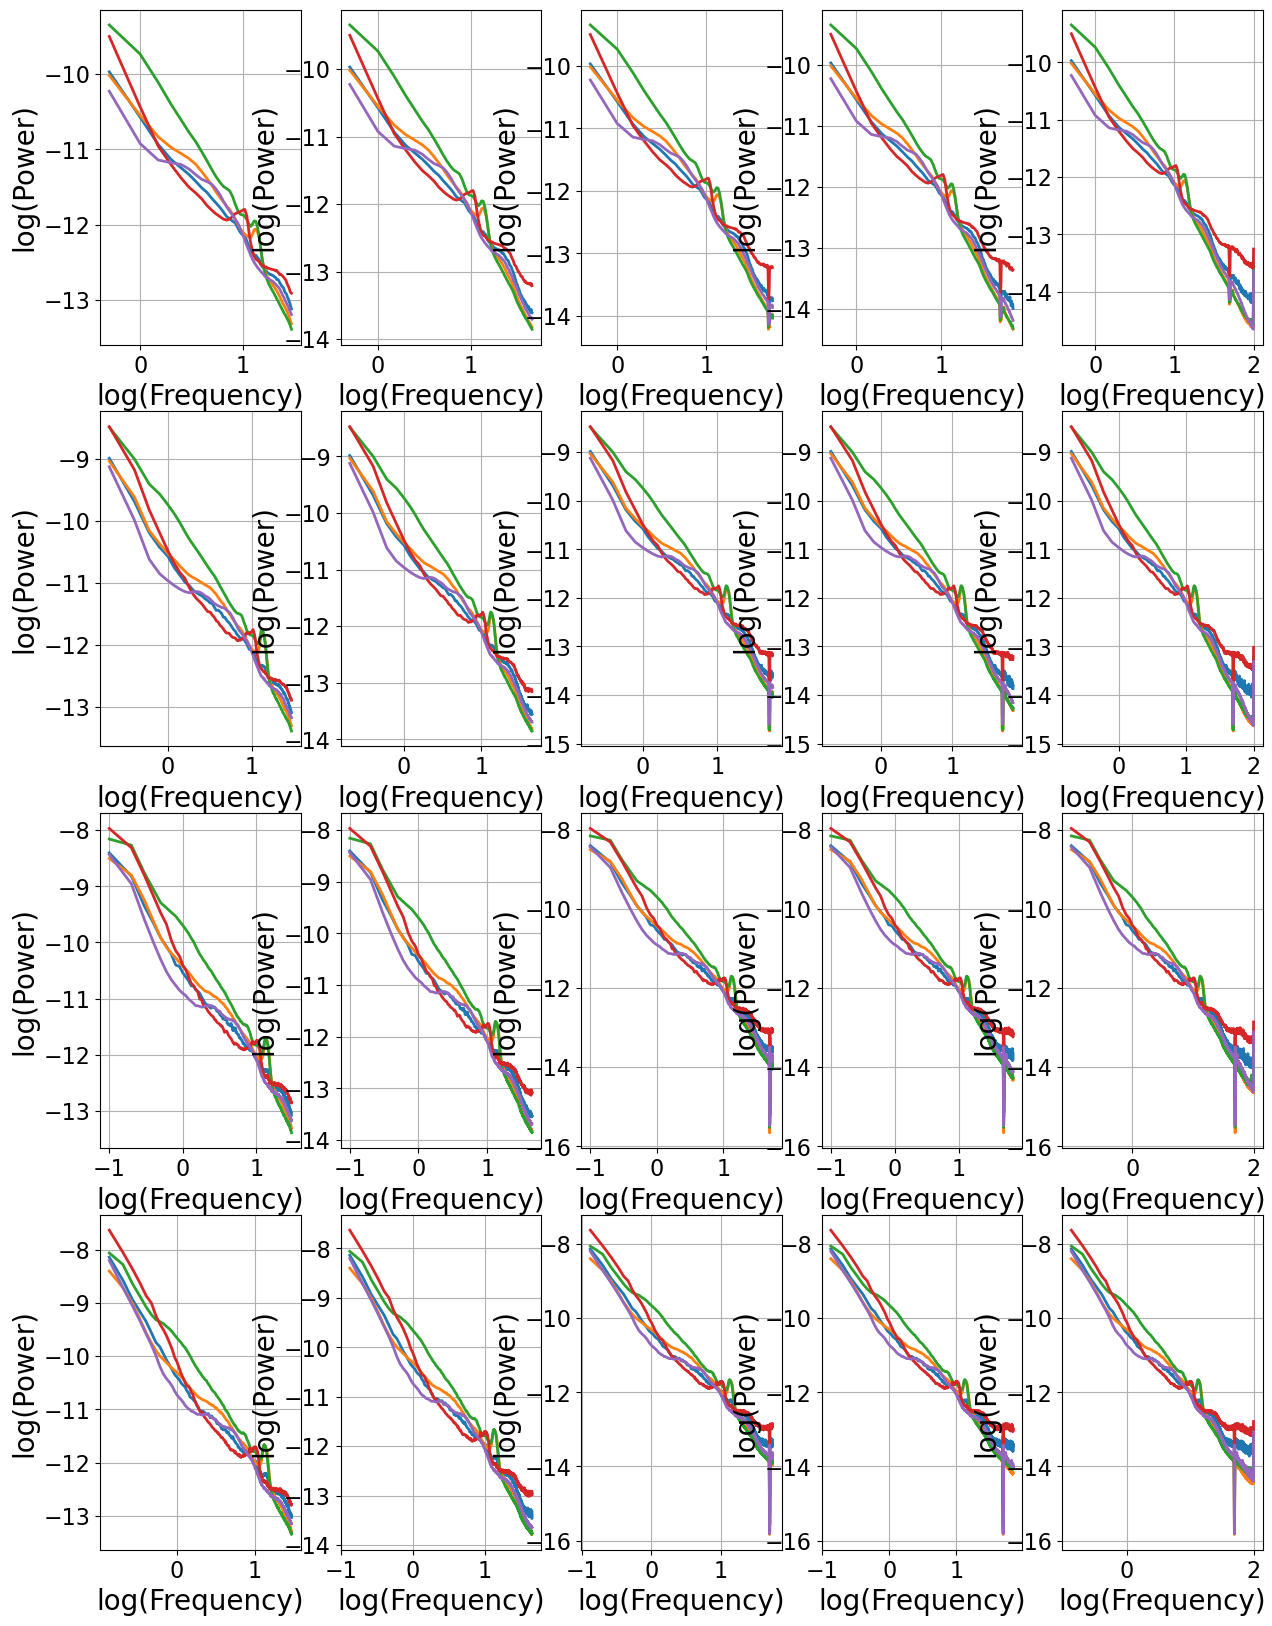

In [4]:
# Now we load all the files for the combinations of frequencies and time steps for all subjects during all sleep stages.

N1_psd={}
N2_psd={}
N3_psd={}
AW_psd={}
RM_psd={}

F_PARAMS = ['F30', 'F45', 'F55', 'F70', 'F100']
T_PARAMS = ['T2', 'T5', 'T10', 'T15', 'T20']
axes = iter(make_axes(20, 5, figsize=(15, 20))) # custom function for subplotting

for CUR_T_PARAM in T_PARAMS:
    for CUR_F_PARAM in F_PARAMS:
        i = 0
        freqs_d = np.load((path_freqs/(CUR_T_PARAM + CUR_F_PARAM + '_freqres.npy')))
        for subj in sbj_folders:  
            N1_psd[i] = np.mean(np.load(path_files / subj / 'N1' / (CUR_T_PARAM + '_' + CUR_F_PARAM + '.npy')),0)
            N2_psd[i] = np.mean(np.load(path_files / subj /'N2' / (CUR_T_PARAM + '_' + CUR_F_PARAM + '.npy')),0)
            N3_psd[i] = np.mean(np.load(path_files / subj /'N3' / (CUR_T_PARAM + '_' + CUR_F_PARAM + '.npy')),0)
            AW_psd[i] = np.mean(np.load(path_files / subj /'AW' / (CUR_T_PARAM + '_' + CUR_F_PARAM + '.npy')),0)
            RM_psd[i] = np.mean(np.load(path_files / subj /'RM' / (CUR_T_PARAM + '_' + CUR_F_PARAM + '.npy')),0)
            i = i+1
          
        # mean over all subjects per condition
        lN1 = list(iter(N1_psd.values())) #convert values to list
        lN2 = list(iter(N2_psd.values())) #convert values to list
        lN3 = list(iter(N3_psd.values())) #convert values to list
        lAW = list(iter(AW_psd.values())) #convert values to list
        lRM = list(iter(RM_psd.values())) #convert values to list

        dN1 = {}
        dN2 = {}
        dN3 = {}
        dAW = {}
        dRM = {}

        for ii in range(len(lN1[0])): 
           row_list = [row[ii] for row in lN1]                 #get values column-wise
           dN1[ii] = sum(row_list)/len(row_list)   

           row_list = [row[ii] for row in lN2]                 #get values column-wise
           dN2[ii] = sum(row_list)/len(row_list)

           row_list = [row[ii] for row in lN3]                 #get values column-wise
           dN3[ii] = sum(row_list)/len(row_list)

           row_list = [row[ii] for row in lAW]                 #get values column-wise
           dAW[ii] = sum(row_list)/len(row_list)

           row_list = [row[ii] for row in lRM]                 #get values column-wise
           dRM[ii] = sum(row_list)/len(row_list)

        plot_spectra(freqs_d,[list(dN1.values()),list(dN2.values()),list(dN3.values()),
        list(dAW.values()),list(dRM.values())], log_freqs=True, log_powers=True, ax=next(axes))
        
#plt.savefig("Group_PSDs_median_0.1.svg", dpi = 500 )


In [107]:
i = 0
CUR_F_PARAM = 'F30'
CUR_T_PARAM = 'T2'

for subj in sbj_folders:  
    N1_psd[i] = np.mean(np.load(path_files / subj /'N1' / (CUR_T_PARAM + '_' + CUR_F_PARAM + '.npy')),0)
    N2_psd[i] = np.mean(np.load(path_files / subj /'N2' / (CUR_T_PARAM + '_' + CUR_F_PARAM + '.npy')),0)
    N3_psd[i] = np.mean(np.load(path_files / subj /'N3' / (CUR_T_PARAM + '_' + CUR_F_PARAM + '.npy')),0)
    AW_psd[i] = np.mean(np.load(path_files / subj /'AW' / (CUR_T_PARAM + '_' + CUR_F_PARAM + '.npy')),0)
    RM_psd[i] = np.mean(np.load(path_files / subj /'RM' / (CUR_T_PARAM + '_' + CUR_F_PARAM + '.npy')),0)
    i = i+1

lN1 = list(iter(N1_psd.values())) #convert values to list
lN2 = list(iter(N2_psd.values())) #convert values to list
lN3 = list(iter(N3_psd.values())) #convert values to list
lAW = list(iter(AW_psd.values())) #convert values to list
lRM = list(iter(RM_psd.values())) #convert values to list

dN1 = {}
dN2 = {}
dN3 = {}
dAW = {}
dRM = {}

for ii in range(len(lN1[0])): 
   row_list = [row[ii] for row in lN1]                 #get values column-wise
   dN1[ii] = sum(row_list)/len(row_list)   
    
   row_list = [row[ii] for row in lN2]                 #get values column-wise
   dN2[ii] = sum(row_list)/len(row_list)
    
   row_list = [row[ii] for row in lN3]                 #get values column-wise
   dN3[ii] = sum(row_list)/len(row_list)
    
   row_list = [row[ii] for row in lAW]                 #get values column-wise
   dAW[ii] = sum(row_list)/len(row_list)
    
   row_list = [row[ii] for row in lRM]         z        #get values column-wise
   dRM[ii] = sum(row_list)/len(row_list)

plot_spectra(np.arange(0, len(dN1)),[list(dN1.values()),list(dN2.values()),list(dN3.values()),
list(dAW.values()),list(dRM.values())], log_freqs=True, log_powers=True, labels=['Wake','N1','N2','N3','REM'])

In [11]:
N1_psd1={}
N2_psd1={}
N3_psd1={}
AW_psd1={}
RM_psd1={}
i = 0
for subj in sbj_folders:  
    N1_psd1[i] = np.load(path_files / subj / 'N1' / ('T2' + '_' + 'F30' + '.npy'))
    N2_psd1[i] = np.load(path_files / subj /'N2' / ('T2' + '_' + 'F30' + '.npy'))
    N3_psd1[i] = np.load(path_files / subj /'N3' / ('T2' + '_' + 'F30' + '.npy'))
    AW_psd1[i] = np.load(path_files / subj /'AW' / ('T2' + '_' + 'F30' + '.npy'))
    RM_psd1[i] = np.load(path_files / subj /'RM' / ('T2' + '_' + 'F30' + '.npy'))
    i = i+1

In [35]:
sbj_folders

[PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/VP01'),
 PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/VP03'),
 PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/VP04'),
 PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/VP05'),
 PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/VP06'),
 PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/VP07'),
 PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/VP08'),
 PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/VP10'),
 PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/VP11'),
 PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/VP12'),
 PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/VP13'),
 PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/VP14'),
 PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/VP15'),
 PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/VP16'),
 PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/VP17'),
 PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/VP18'),
 PosixPath('/home/b1044271/Columbia/Resu

In [55]:
l = list(iter(N1_psd1.values()))                      #convert values to list
d={}                                                                  #final ditionary
for i in range(np.size(l[0],1)): 
   row_list = [row[i] for row in l]                     #get values column-wise
   d['location'+str(i+1)] = sum(row_list)/len(row_list)               #calculate avg

print(d)

IndexError: index 19 is out of bounds for axis 0 with size 19

In [66]:
np.size(l[0],1)

59

In [46]:
row(l[4])

NameError: name 'row' is not defined

In [27]:
freqs_d

array([ 0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45,  0.5 ,
        0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,  0.95,
        1.  ,  1.05,  1.1 ,  1.15,  1.2 ,  1.25,  1.3 ,  1.35,  1.4 ,
        1.45,  1.5 ,  1.55,  1.6 ,  1.65,  1.7 ,  1.75,  1.8 ,  1.85,
        1.9 ,  1.95,  2.  ,  2.05,  2.1 ,  2.15,  2.2 ,  2.25,  2.3 ,
        2.35,  2.4 ,  2.45,  2.5 ,  2.55,  2.6 ,  2.65,  2.7 ,  2.75,
        2.8 ,  2.85,  2.9 ,  2.95,  3.  ,  3.05,  3.1 ,  3.15,  3.2 ,
        3.25,  3.3 ,  3.35,  3.4 ,  3.45,  3.5 ,  3.55,  3.6 ,  3.65,
        3.7 ,  3.75,  3.8 ,  3.85,  3.9 ,  3.95,  4.  ,  4.05,  4.1 ,
        4.15,  4.2 ,  4.25,  4.3 ,  4.35,  4.4 ,  4.45,  4.5 ,  4.55,
        4.6 ,  4.65,  4.7 ,  4.75,  4.8 ,  4.85,  4.9 ,  4.95,  5.  ,
        5.05,  5.1 ,  5.15,  5.2 ,  5.25,  5.3 ,  5.35,  5.4 ,  5.45,
        5.5 ,  5.55,  5.6 ,  5.65,  5.7 ,  5.75,  5.8 ,  5.85,  5.9 ,
        5.95,  6.  ,  6.05,  6.1 ,  6.15,  6.2 ,  6.25,  6.3 ,  6.35,
        6.4 ,  6.45,

In [23]:
N1_psd.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

In [17]:
N1psd_m = np.array(list(N1_psd.values())).mean()

ValueError: operands could not be broadcast together with shapes (85,1486) (38,1486) 

In [ ]:
plot_spectra(np.arange(0, N1_psd.shape[1],1),[np.mean(N1_psd,0),np.mean(N2_psd,0),np.mean(N3_psd,0),
np.mean(AW_psd,0),np.mean(RM_psd,0)], log_freqs=True, log_powers=True, ax=next(axes))